In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import os.path as op
import pandas as pd
import os
import mne
import csv
import glob
from mne.io import read_epochs_fieldtrip
from mne import create_info
from scipy.signal.windows import hann
import scipy.io
from scipy.io import loadmat
from lagged_coherence import lagged_hilbert_coherence
import mat73
import json

In [173]:
c3_chans=['E30','E36','E41','E31','E37','E42','E54','E53']
c4_chans=['E105','E104','E103','E80','E87','E93','E79','E86']
c_chans=[]
c_chans.extend(c3_chans)
c_chans.extend(c4_chans)

In [83]:
def compute_lagged_coherence(age):
    subjects=[os.path.split(x)[-1] for x in glob.glob('/home/common/bonaiuto/devmobeta/data/sub-*')]
    subject_age_path=os.path.join('/home/common/bonaiuto/devmobeta/derivatives/')
    subjects= os.path.join(subject_age_path,'participants.csv')
    
    sub_psds = []
    
    subjects_path = '/home/common/bonaiuto/devmobeta/data/sub-*'
    subject_ids = [os.path.split(x)[-1] for x in glob.glob(subjects_path)]
    
    with open(subjects, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            print("Processing row:", row)
            subject=row['subject_id']
            session=row['session']
            subject_age = row['age']
            print("Subject:", subject, "Age:", subject_age)
            
            if subject_age==age:
                print(f"Processing subject {subject} with age {subject_age}")
                sub_path=os.path.join('/home/common/bonaiuto/devmobeta/derivatives/',subject)
                ses_path=os.path.join(sub_path, session)
                print(ses_path)
                if os.path.exists(os.path.join(ses_path,'eeg','NEARICA_NF')): 
                    print(f"Processing subject {subject} with age {subject_age} and session {session}")
                    eeg_path=os.path.join(ses_path,'eeg','NEARICA_NF')
                    fname = os.path.join(eeg_path, f'04_rereferenced_data/{subject}_task-devmobeta_grasp_eeg_rereferenced_data.set')
                    print(fname)
        
                    if os.path.exists(fname):
                        print('ok')
                        data = mne.read_epochs_eeglab(fname)
                        times = data.times
                        trials = data.get_data()[:, 11, :]
        
                        freqs = np.arange(1.25, 50.25, .25)
                        lags = np.arange(0.1, 1, .05)
                        srate = 1000
                        ch_lc = lagged_hilbert_coherence(trials, freqs, lags, srate, n_jobs=20)
        
                        lagged_coh = np.array(ch_lc)
                        np.save(f'lagged_coh_{subject_age}.npy', lagged_coh)
                    else:
                        continue

    return freqs, lagged_coh

In [84]:
freqs, lagged_coh_three=compute_lagged_coherence('three') 
freqs, lagged_coh_six=compute_lagged_coherence('six') 
freqs, lagged_coh_twelve=compute_lagged_coherence('twelve') 

Processing row: {'subject_id': 'sub-201', 'orig_participant_id': 'LZ', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-201 Age: three
Processing subject sub-201 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-201/ses-01
Processing subject sub-201 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-201/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-201_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-201/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-201_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-201', 'orig_participant_id': 'LZ', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-201 Age: six
Processing row: {'subject_id': 'sub-201', 'orig_participant_id': 'LZ', 'session': 'ses-06', 'age': 'twelve', 'sex': 'M'}
Subject: sub-201 Age: twelve
Processing row: {'subject_id': 'sub-202', 'orig_participant_id': 'RA', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-202 Age: six
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-203 Age: three
Processing subject sub-203 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-02
Processing subject sub-203 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-203_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-02/eeg/NEARICA_N

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-203 Age: six
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-203 Age: twelve
Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-01', 'age': 'six', 'sex': 'F'}
Subject: sub-204 Age: six
Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-04', 'age': 'twelve', 'sex': 'F'}
Subject: sub-204 Age: twelve
Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-205 Age: three
Processing subject sub-205 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-205/ses-01
Processing subject sub-205 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-205/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-2

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-205 Age: six
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-206 Age: three
Processing subject sub-206 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-02
Processing subject sub-206 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-206_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-206_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-206 Age: six
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-206 Age: twelve
Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-207 Age: three
Processing subject sub-207 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-02
Processing subject sub-207 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-207_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-207_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
41 matching events found
No baseline corre

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-207 Age: six
Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-207 Age: twelve
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-208 Age: three
Processing subject sub-208 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-02
Processing subject sub-208 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
16 matching events found
No baseline corr

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-208 Age: six
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-208 Age: twelve
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-209 Age: three
Processing subject sub-209 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-01
Processing subject sub-209 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
11 matching events found
No baseline cor

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-209 Age: six
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-209 Age: twelve
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-210 Age: three
Processing subject sub-210 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-01
Processing subject sub-210 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-210_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-210_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
19 matching events found
No baseline corr

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-210 Age: six
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-04', 'age': 'twelve', 'sex': 'M'}
Subject: sub-210 Age: twelve
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-211 Age: three
Processing subject sub-211 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-01
Processing subject sub-211 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-211_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-211_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
20 matching events found
No baseline co

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-211 Age: six
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-211 Age: twelve
Processing row: {'subject_id': 'sub-212', 'orig_participant_id': 'IV', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-212 Age: three
Processing subject sub-212 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-02
Processing subject sub-212 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-212_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-212_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
15 matching events found
No baseline cor

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-212', 'orig_participant_id': 'IV', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-212 Age: six
Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-213 Age: three
Processing subject sub-213 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-01
Processing subject sub-213 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-213_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-213_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-213 Age: six
Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-213 Age: twelve
Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-214 Age: three
Processing subject sub-214 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-214/ses-01
Processing subject sub-214 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-214/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-214_task-devmobeta_grasp_eeg_rereferenced_data.set
Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-214 Age: six
Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-04', 'age': 'tw

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-215', 'orig_participant_id': 'BG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-215 Age: six
Processing row: {'subject_id': 'sub-215', 'orig_participant_id': 'BG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-215 Age: twelve
Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-216 Age: three
Processing subject sub-216 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-01
Processing subject sub-216 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-216_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-216_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
19 matching events found
No baseline corre

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-216 Age: six
Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-216 Age: twelve
Processing row: {'subject_id': 'sub-217', 'orig_participant_id': 'MA', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-217 Age: three
Processing subject sub-217 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-01
Processing subject sub-217 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-217_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-217_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
10 matching events found
No baseline corre

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-217', 'orig_participant_id': 'MA', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-217 Age: six
Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'ABL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-218 Age: three
Processing subject sub-218 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-01
Processing subject sub-218 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-218_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-218_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'ABL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-218 Age: six
Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'AB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-218 Age: twelve
Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-219 Age: three
Processing subject sub-219 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-01
Processing subject sub-219 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-219_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-219_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
18 matching events found
No baseline cor

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-219 Age: six
Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-220 Age: three
Processing subject sub-220 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-01
Processing subject sub-220 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-220_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-220_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-220 Age: six
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-221 Age: three
Processing subject sub-221 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-02
Processing subject sub-221 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-221_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-221_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-221 Age: six
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-221 Age: twelve
Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-222 Age: three
Processing subject sub-222 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-222/ses-01
Processing subject sub-222 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-222/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-222_task-devmobeta_grasp_eeg_rereferenced_data.set
Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-222 Age: six
Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-04', 'age': 'tw

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-223', 'orig_participant_id': 'LB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-223 Age: six
Processing row: {'subject_id': 'sub-223', 'orig_participant_id': 'LB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-223 Age: twelve
Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-224 Age: three
Processing subject sub-224 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-02
Processing subject sub-224 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-224_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-224_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
13 matching events found
No baseline corre

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-224 Age: six
Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-04', 'age': 'twelve', 'sex': 'M'}
Subject: sub-224 Age: twelve
Processing row: {'subject_id': 'sub-225', 'orig_participant_id': 'MD', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-225 Age: three
Processing subject sub-225 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-02
Processing subject sub-225 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-225_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-225_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
12 matching events found
No baseline corre

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-225', 'orig_participant_id': 'MD', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-225 Age: six
Processing row: {'subject_id': 'sub-226', 'orig_participant_id': 'DLC', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-226 Age: three
Processing subject sub-226 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-02
Processing subject sub-226 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-226_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-226_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-226', 'orig_participant_id': 'DLC', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-226 Age: six
Processing row: {'subject_id': 'sub-227', 'orig_participant_id': 'HC', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-227 Age: three
Processing subject sub-227 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-227/ses-01
Processing subject sub-227 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-227/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-227_task-devmobeta_grasp_eeg_rereferenced_data.set
Processing row: {'subject_id': 'sub-227', 'orig_participant_id': 'HC', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-227 Age: six
Processing row: {'subject_id': 'sub-228', 'orig_participant_id': 'AFW', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-228 Age: three
Processing subject sub-228 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-228/ses-02
P

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-229', 'orig_participant_id': 'AE', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-229 Age: six
Processing row: {'subject_id': 'sub-230', 'orig_participant_id': 'IM', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-230 Age: three
Processing subject sub-230 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-230/ses-01
Processing subject sub-230 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-230/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-230_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-230/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-230_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
22 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-230', 'orig_participant_id': 'IM', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-230 Age: six
Processing row: {'subject_id': 'sub-231', 'orig_participant_id': 'JC', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-231 Age: three
Processing subject sub-231 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-231/ses-01
Processing subject sub-231 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-231/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-231_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-231/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-231_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-231', 'orig_participant_id': 'JC', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-231 Age: six
Processing row: {'subject_id': 'sub-232', 'orig_participant_id': 'TG', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-232 Age: three
Processing subject sub-232 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-232/ses-01
Processing subject sub-232 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-232/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-232_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-232/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-232_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-232', 'orig_participant_id': 'TG', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-232 Age: six
Processing row: {'subject_id': 'sub-233', 'orig_participant_id': 'TB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-233 Age: three
Processing subject sub-233 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-01
Processing subject sub-233 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-233_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-233_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-233', 'orig_participant_id': 'TB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-233 Age: six
Processing row: {'subject_id': 'sub-234', 'orig_participant_id': 'MR', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-234 Age: three
Processing subject sub-234 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-234/ses-02
Processing subject sub-234 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-234/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-234_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-234/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-234_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-234', 'orig_participant_id': 'MR', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-234 Age: six
Processing row: {'subject_id': 'sub-235', 'orig_participant_id': 'LC', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-235 Age: three
Processing subject sub-235 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-235/ses-01
Processing subject sub-235 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-235/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-235_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-235/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-235_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num /

Processing row: {'subject_id': 'sub-235', 'orig_participant_id': 'LC', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-235 Age: six
Processing row: {'subject_id': 'sub-236', 'orig_participant_id': 'ES', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-236 Age: three
Processing subject sub-236 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-236/ses-01
Processing subject sub-236 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-236/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-236_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-236/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-236_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-236', 'orig_participant_id': 'ES', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-236 Age: six
Processing row: {'subject_id': 'sub-237', 'orig_participant_id': 'LMP', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-237 Age: three
Processing subject sub-237 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-237/ses-01
Processing subject sub-237 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-237/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-237_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-237/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-237_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-238', 'orig_participant_id': 'LM', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-238 Age: three
Processing subject sub-238 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-238/ses-02
Processing subject sub-238 with age three and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-238/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-238_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-238/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-238_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Ready.


/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num /

Processing row: {'subject_id': 'sub-238', 'orig_participant_id': 'LM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-238 Age: six
Processing row: {'subject_id': 'sub-239', 'orig_participant_id': 'ABV', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-239 Age: six
Processing row: {'subject_id': 'sub-240', 'orig_participant_id': 'ABV', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-240 Age: six
Processing row: {'subject_id': 'sub-241', 'orig_participant_id': 'IB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-241 Age: three
Processing subject sub-241 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-241/ses-01
Processing subject sub-241 with age three and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-241/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-241_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-241/ses-01/eeg/NEARICA_NF/04

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-241', 'orig_participant_id': 'IB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-241 Age: six
Processing row: {'subject_id': 'sub-242', 'orig_participant_id': 'LM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-242 Age: three
Processing subject sub-242 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-242/ses-01
Processing row: {'subject_id': 'sub-243', 'orig_participant_id': 'CD', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-243 Age: three
Processing subject sub-243 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-243/ses-01
Processing row: {'subject_id': 'sub-244', 'orig_participant_id': 'GB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-244 Age: three
Processing subject sub-244 with age three
/home/common/bonaiuto/devmobeta/derivatives/sub-244/ses-01
Processing row: {'subject_id': 'sub-245', 'orig_participant_id': 'MP', 'session': 'ses-01', 'age': 'three', '

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-201', 'orig_participant_id': 'LZ', 'session': 'ses-06', 'age': 'twelve', 'sex': 'M'}
Subject: sub-201 Age: twelve
Processing row: {'subject_id': 'sub-202', 'orig_participant_id': 'RA', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-202 Age: six
Processing subject sub-202 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-202/ses-02
Processing subject sub-202 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-202/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-202_task-devmobeta_grasp_eeg_rereferenced_data.set
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-203 Age: three
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-203 Age: six
Processing subject sub-203 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-04
Process

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-203 Age: twelve
Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-01', 'age': 'six', 'sex': 'F'}
Subject: sub-204 Age: six
Processing subject sub-204 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-01
Processing subject sub-204 with age six and session ses-01
/home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-204_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-01/eeg/NEARICA_NF/04_rereferenced_data/sub-204_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-04', 'age': 'twelve', 'sex': 'F'}
Subject: sub-204 Age: twelve
Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-205 Age: three
Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-205 Age: six
Processing subject sub-205 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-205/ses-02
Processing subject sub-205 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-205/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-205_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-205/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-205_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
29 matching events found
No baseline correcti

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-206 Age: three
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-206 Age: six
Processing subject sub-206 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-04
Processing subject sub-206 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-206_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-206_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
63 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-206 Age: twelve
Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-207 Age: three
Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-207 Age: six
Processing subject sub-207 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-04
Processing subject sub-207 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-207_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-207/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-207_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
20 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-207 Age: twelve
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-208 Age: three
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-208 Age: six
Processing subject sub-208 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-03
Processing subject sub-208 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
44 matching events found
No baseline correct

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-208 Age: twelve
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-209 Age: three
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-209 Age: six
Processing subject sub-209 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-03
Processing subject sub-209 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
11 matching events found
No baseline correcti

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-209 Age: twelve
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-210 Age: three
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-210 Age: six
Processing subject sub-210 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-03
Processing subject sub-210 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-210_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-210_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
36 matching events found
No baseline correct

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-04', 'age': 'twelve', 'sex': 'M'}
Subject: sub-210 Age: twelve
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-211 Age: three
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-211 Age: six
Processing subject sub-211 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-03
Processing subject sub-211 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-211_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-211/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-211_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
62 matching events found
No baseline correc

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-211 Age: twelve
Processing row: {'subject_id': 'sub-212', 'orig_participant_id': 'IV', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-212 Age: three
Processing row: {'subject_id': 'sub-212', 'orig_participant_id': 'IV', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-212 Age: six
Processing subject sub-212 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-03
Processing subject sub-212 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-212_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-212/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-212_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
52 matching events found
No baseline correcti

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-213 Age: three
Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-213 Age: six
Processing subject sub-213 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-04
Processing subject sub-213 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-213_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-213/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-213_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-213', 'orig_participant_id': 'PG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-213 Age: twelve
Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-214 Age: three
Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-214 Age: six
Processing subject sub-214 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-214/ses-03
Processing subject sub-214 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-214/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-214_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-214/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-214_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
27 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-214', 'orig_participant_id': 'AD', 'session': 'ses-04', 'age': 'twelve', 'sex': 'F'}
Subject: sub-214 Age: twelve
Processing row: {'subject_id': 'sub-215', 'orig_participant_id': 'BG', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-215 Age: three
Processing row: {'subject_id': 'sub-215', 'orig_participant_id': 'BG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-215 Age: six
Processing subject sub-215 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-215/ses-03
Processing subject sub-215 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-215/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-215_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-215/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-215_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
6 matching events found
No baseline correction

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-215', 'orig_participant_id': 'BG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-215 Age: twelve
Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-216 Age: three
Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-216 Age: six
Processing subject sub-216 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-03
Processing subject sub-216 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-216_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-216/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-216_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
6 matching events found
No baseline correction

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-216', 'orig_participant_id': 'CG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-216 Age: twelve
Processing row: {'subject_id': 'sub-217', 'orig_participant_id': 'MA', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-217 Age: three
Processing row: {'subject_id': 'sub-217', 'orig_participant_id': 'MA', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-217 Age: six
Processing subject sub-217 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-03
Processing subject sub-217 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-217_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-217/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-217_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
72 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'ABL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-218 Age: three
Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'ABL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-218 Age: six
Processing subject sub-218 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-02
Processing subject sub-218 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-218_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-218/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-218_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-218', 'orig_participant_id': 'AB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-218 Age: twelve
Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-219 Age: three
Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-219 Age: six
Processing subject sub-219 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-02
Processing subject sub-219 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-219_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-219/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-219_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
36 matching events found
No baseline correct

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-220 Age: three
Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-220 Age: six
Processing subject sub-220 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-03
Processing subject sub-220 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-220_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-220/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-220_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-221 Age: three
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-221 Age: six
Processing subject sub-221 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-03
Processing subject sub-221 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-221_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-221/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-221_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-221 Age: twelve
Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-222 Age: three
Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-222 Age: six
Processing subject sub-222 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-222/ses-03
Processing subject sub-222 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-222/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-222_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-222/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-222_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
48 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-222', 'orig_participant_id': 'SM', 'session': 'ses-04', 'age': 'twelve', 'sex': 'F'}
Subject: sub-222 Age: twelve
Processing row: {'subject_id': 'sub-223', 'orig_participant_id': 'LB', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-223 Age: three
Processing row: {'subject_id': 'sub-223', 'orig_participant_id': 'LB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-223 Age: six
Processing subject sub-223 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-223/ses-04
Processing subject sub-223 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-223/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-223_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-223/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-223_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
77 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-223', 'orig_participant_id': 'LB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-223 Age: twelve
Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-224 Age: three
Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-224 Age: six
Processing subject sub-224 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-03
Processing subject sub-224 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-224_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-224/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-224_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
76 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-224', 'orig_participant_id': 'OM', 'session': 'ses-04', 'age': 'twelve', 'sex': 'M'}
Subject: sub-224 Age: twelve
Processing row: {'subject_id': 'sub-225', 'orig_participant_id': 'MD', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-225 Age: three
Processing row: {'subject_id': 'sub-225', 'orig_participant_id': 'MD', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-225 Age: six
Processing subject sub-225 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-03
Processing subject sub-225 with age six and session ses-03
/home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-225_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-225/ses-03/eeg/NEARICA_NF/04_rereferenced_data/sub-225_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
51 matching events found
No baseline correctio

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-226', 'orig_participant_id': 'DLC', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-226 Age: three
Processing row: {'subject_id': 'sub-226', 'orig_participant_id': 'DLC', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-226 Age: six
Processing subject sub-226 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-04
Processing subject sub-226 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-226_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-226/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-226_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-227', 'orig_participant_id': 'HC', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-227 Age: three
Processing row: {'subject_id': 'sub-227', 'orig_participant_id': 'HC', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-227 Age: six
Processing subject sub-227 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-227/ses-02
Processing subject sub-227 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-227/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-227_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-227/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-227_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-228', 'orig_participant_id': 'AFW', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-228 Age: three
Processing row: {'subject_id': 'sub-229', 'orig_participant_id': 'AE', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-229 Age: three
Processing row: {'subject_id': 'sub-229', 'orig_participant_id': 'AE', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-229 Age: six
Processing subject sub-229 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-229/ses-03
Processing row: {'subject_id': 'sub-230', 'orig_participant_id': 'IM', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-230 Age: three
Processing row: {'subject_id': 'sub-230', 'orig_participant_id': 'IM', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-230 Age: six
Processing subject sub-230 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-230/ses-03
Processing subject sub-230 with age six and session ses-03
/home/comm

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-231', 'orig_participant_id': 'JC', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-231 Age: three
Processing row: {'subject_id': 'sub-231', 'orig_participant_id': 'JC', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-231 Age: six
Processing subject sub-231 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-231/ses-02
Processing row: {'subject_id': 'sub-232', 'orig_participant_id': 'TG', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-232 Age: three
Processing row: {'subject_id': 'sub-232', 'orig_participant_id': 'TG', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-232 Age: six
Processing subject sub-232 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-232/ses-04
Processing subject sub-232 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-232/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-232_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extrac

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-233', 'orig_participant_id': 'TB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-233 Age: three
Processing row: {'subject_id': 'sub-233', 'orig_participant_id': 'TB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-233 Age: six
Processing subject sub-233 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-04
Processing subject sub-233 with age six and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-233_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-233/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-233_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-234', 'orig_participant_id': 'MR', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-234 Age: three
Processing row: {'subject_id': 'sub-234', 'orig_participant_id': 'MR', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-234 Age: six
Processing subject sub-234 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-234/ses-04
Processing row: {'subject_id': 'sub-235', 'orig_participant_id': 'LC', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-235 Age: three
Processing row: {'subject_id': 'sub-235', 'orig_participant_id': 'LC', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-235 Age: six
Processing subject sub-235 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-235/ses-02
Processing row: {'subject_id': 'sub-236', 'orig_participant_id': 'ES', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-236 Age: three
Processing row: {'subject_id': 'sub-236', 'orig_participant_id': 'ES',

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-240', 'orig_participant_id': 'ABV', 'session': 'ses-02', 'age': 'six', 'sex': 'M'}
Subject: sub-240 Age: six
Processing subject sub-240 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-240/ses-02
Processing subject sub-240 with age six and session ses-02
/home/common/bonaiuto/devmobeta/derivatives/sub-240/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-240_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-240/ses-02/eeg/NEARICA_NF/04_rereferenced_data/sub-240_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-241', 'orig_participant_id': 'IB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-241 Age: three
Processing row: {'subject_id': 'sub-241', 'orig_participant_id': 'IB', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-241 Age: six
Processing subject sub-241 with age six
/home/common/bonaiuto/devmobeta/derivatives/sub-241/ses-04
Processing row: {'subject_id': 'sub-242', 'orig_participant_id': 'LM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-242 Age: three
Processing row: {'subject_id': 'sub-243', 'orig_participant_id': 'CD', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-243 Age: three
Processing row: {'subject_id': 'sub-244', 'orig_participant_id': 'GB', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-244 Age: three
Processing row: {'subject_id': 'sub-245', 'orig_participant_id': 'MP', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-245 Age: three
Processing row: {

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-202', 'orig_participant_id': 'RA', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-202 Age: six
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-203 Age: three
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-04', 'age': 'six', 'sex': 'F'}
Subject: sub-203 Age: six
Processing row: {'subject_id': 'sub-203', 'orig_participant_id': 'NP', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-203 Age: twelve
Processing subject sub-203 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-05
Processing subject sub-203 with age twelve and session ses-05
/home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-05/eeg/NEARICA_NF/04_rereferenced_data/sub-203_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-203/ses-05/eeg/NEARICA

/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num /

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: Ru

Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-01', 'age': 'six', 'sex': 'F'}
Subject: sub-204 Age: six
Processing row: {'subject_id': 'sub-204', 'orig_participant_id': 'AJG', 'session': 'ses-04', 'age': 'twelve', 'sex': 'F'}
Subject: sub-204 Age: twelve
Processing subject sub-204 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-04
Processing subject sub-204 with age twelve and session ses-04
/home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-204_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-204/ses-04/eeg/NEARICA_NF/04_rereferenced_data/sub-204_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Ready.


/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-205 Age: three
Processing row: {'subject_id': 'sub-205', 'orig_participant_id': 'AL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-205 Age: six
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-206 Age: three
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-04', 'age': 'six', 'sex': 'M'}
Subject: sub-206 Age: six
Processing row: {'subject_id': 'sub-206', 'orig_participant_id': 'MF', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-206 Age: twelve
Processing subject sub-206 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-206/ses-05
Processing row: {'subject_id': 'sub-207', 'orig_participant_id': 'FM', 'session': 'ses-02', 'age': 'three', 'sex': 'M'}
Subject: sub-207 Age: three
Processing row: 

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-208 Age: three
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-208 Age: six
Processing row: {'subject_id': 'sub-208', 'orig_participant_id': 'MPG', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-208 Age: twelve
Processing subject sub-208 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-05
Processing subject sub-208 with age twelve and session ses-05
/home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-05/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-208/ses-05/eeg/NEARICA_NF/04_rereferenced_data/sub-208_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
62 matching events found
No baseline 

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-209 Age: three
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-209 Age: six
Processing row: {'subject_id': 'sub-209', 'orig_participant_id': 'TA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'M'}
Subject: sub-209 Age: twelve
Processing subject sub-209 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-05
Processing subject sub-209 with age twelve and session ses-05
/home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-05/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set
ok
Extracting parameters from /home/common/bonaiuto/devmobeta/derivatives/sub-209/ses-05/eeg/NEARICA_NF/04_rereferenced_data/sub-209_task-devmobeta_grasp_eeg_rereferenced_data.set...
Not setting metadata
26 matching events found
No baseline cor

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobeta_grasp/analysis/lagged_coherence.py:307: RuntimeWarning: invalid value encountered in divide
  lc = np.abs(num / denom)
/home/mgautier/devmobet

Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-01', 'age': 'three', 'sex': 'M'}
Subject: sub-210 Age: three
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-03', 'age': 'six', 'sex': 'M'}
Subject: sub-210 Age: six
Processing row: {'subject_id': 'sub-210', 'orig_participant_id': 'SLO', 'session': 'ses-04', 'age': 'twelve', 'sex': 'M'}
Subject: sub-210 Age: twelve
Processing subject sub-210 with age twelve
/home/common/bonaiuto/devmobeta/derivatives/sub-210/ses-04
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-211 Age: three
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-211 Age: six
Processing row: {'subject_id': 'sub-211', 'orig_participant_id': 'CMB', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
Subject: sub-211 Age: twelve
Processi

/tmp/ipykernel_20713/1026002431.py:33: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.read_epochs_eeglab(fname)
/tmp/ipykernel_20713/1026002431.py:35: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials = data.get_data()[:, 11, :]


Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-219 Age: three
Processing row: {'subject_id': 'sub-219', 'orig_participant_id': 'EBL', 'session': 'ses-02', 'age': 'six', 'sex': 'F'}
Subject: sub-219 Age: six
Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-01', 'age': 'three', 'sex': 'F'}
Subject: sub-220 Age: three
Processing row: {'subject_id': 'sub-220', 'orig_participant_id': 'SM', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-220 Age: six
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-02', 'age': 'three', 'sex': 'F'}
Subject: sub-221 Age: three
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-03', 'age': 'six', 'sex': 'F'}
Subject: sub-221 Age: six
Processing row: {'subject_id': 'sub-221', 'orig_participant_id': 'MA', 'session': 'ses-05', 'age': 'twelve', 'sex': 'F'}
S

In [115]:
lagged_coh_three=np.load(f'lagged_coh_three.npy')
lagged_coh_six=np.load(f'lagged_coh_six.npy')
lagged_coh_twelve=np.load(f'lagged_coh_twelve.npy')

In [120]:
three_frange = np.load(f'frequency_ranges_three.npy', allow_pickle=True)
six_frange = np.load(f'frequency_ranges_six.npy', allow_pickle=True)
twelve_frange = np.load(f'frequency_ranges_twelve.npy', allow_pickle=True)

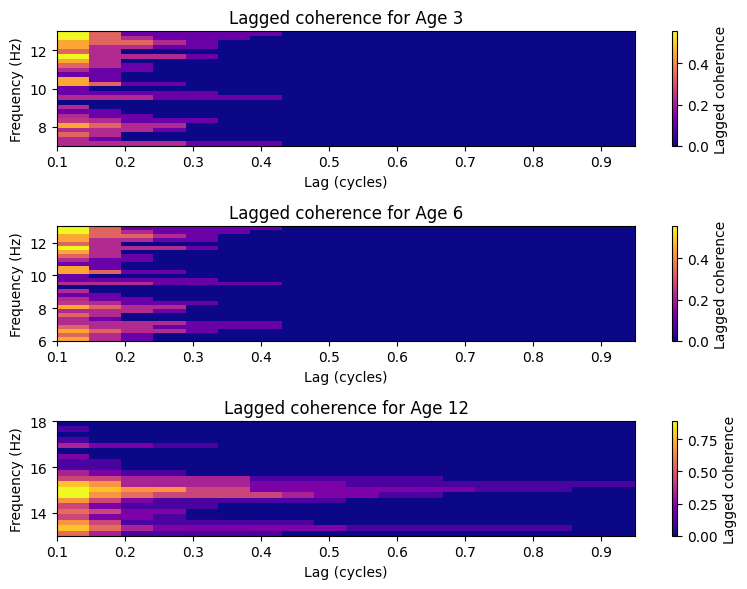

In [143]:
def plot_lagged_coherence(age, freqs, lags, ch_lc):
    if age == 3:
        age_frange = np.where((freqs >= 7) & (freqs <= 13))[0]
    elif age == 6:
        age_frange = np.where((freqs >= 6) & (freqs <= 13))[0]
    elif age == 12:
        age_frange = np.where((freqs >= 13) & (freqs <= 18))[0]
    else:
        raise ValueError("Invalid age. Supported ages are 3, 6, and 12.")

    plt.imshow(np.nanmean(ch_lc[:, age_frange, :], axis=0), aspect='auto', cmap='plasma', 
               extent=[lags[0], lags[-1], freqs[age_frange[0]], freqs[age_frange[-1]]], 
               origin='lower')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Lag (cycles)')
    plt.colorbar(label='Lagged coherence')
    plt.tight_layout()

# Plot coherence across all frequencies with respect to lags for each age group
plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plot_lagged_coherence(3, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 3')

plt.subplot(3, 1, 2)
plot_lagged_coherence(6, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 6')

plt.subplot(3, 1, 3)
plot_lagged_coherence(12, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 12')

plt.tight_layout()
plt.show()

In [145]:
def plot_lagged_coherence (age): 
    three_frange=np.where((freqs>=7) & (freqs<=13))[0]
    six_frange=np.where((freqs>=6) & (freqs<=13))[0]
    twelve_frange=np.where((freqs>=13) & (freqs<=18))[0]
    
    plt.figure()
    plt.subplot(2,2,1)
    i1=plt.imshow(np.nanmean(ch_lc,axis=0), aspect='auto', cmap='plasma', 
                  extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
                  origin='lower')
    plt.ylabel('Frequency (Hz)')
    plt.subplot(2,2,3)
    plt.plot(lags,np.nanmean(np.nanmean(ch_lc[:,three_frange,:],axis=1),axis=0),label='beta_3')
    plt.plot(lags,np.nanmean(np.nanmean(ch_lc[:,six_frange,:],axis=1),axis=0),label='beta_6')
    plt.plot(lags,np.nanmean(np.nanmean(ch_lc[:,twelve_frange,:],axis=1),axis=0),label='beta_12')
    plt.xlabel('Lag (cycles)')
    plt.ylabel('Lagged coherence')
    plt.legend()
    plt.tight_layout()

    return three_frange, six_frange, twelve_frange

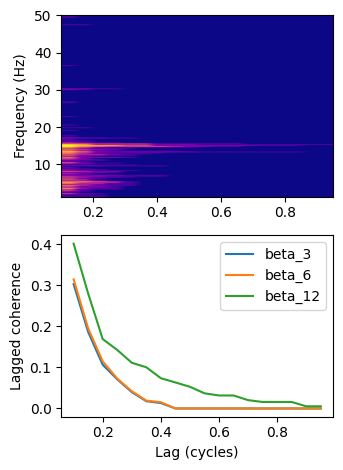

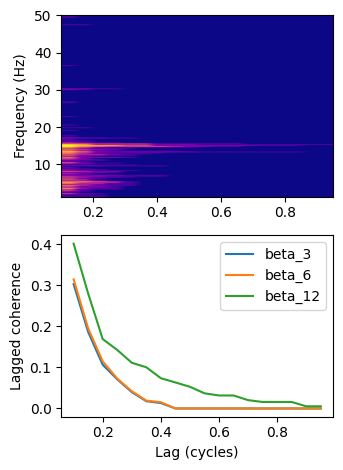

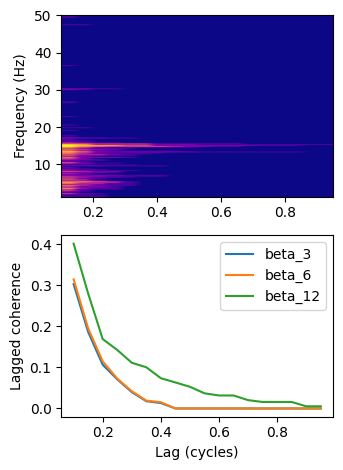

In [147]:
three_frange = plot_lagged_coherence(3)
six_frange = plot_lagged_coherence(6)
twelve_frange = plot_lagged_coherence(12)

In [193]:
def plot_lagged_coherence (age, freqs, ch_lc): 

    if age == 'three':
        file_path = 'frequency_ranges_three.json'
    elif age == 'six':
        file_path = 'frequency_ranges_six.json'
    elif age == 'twelve':
        file_path = 'frequency_ranges_twelve.json'
    else:
        raise ValueError("Invalid age")

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Check if the file is empty
    if os.path.getsize(file_path) == 0:
        raise ValueError(f"The file {file_path} is empty.")

    with open(file_path, 'r') as json_file:
        try:
            frequency_ranges = json.load(json_file)
        except json.JSONDecodeError as e:
            raise ValueError(f"Error decoding JSON from file {file_path}: {e}")
    
    print(frequency_ranges)  

    if 'FOI_2' not in frequency_ranges:
        raise ValueError(f"FOI_2 not found in the JSON file {file_path}")

    age_frange=frequency_ranges['FOI_2']['frequency_range']

    l_idx = np.where(freqs >= age_frange[0])[0][0]
    r_idx = np.where(freqs <= age_frange[1])[0][-1]

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(lags, np.nanmean(np.nanmean(ch_lc[:, l_idx:r_idx+1, :], axis=1), axis=0))
    plt.xlabel('Lag (cycles)')
    plt.ylabel('Lagged coherence')
    plt.title(f'Lagged coherence for age {age}')

    plt.subplot(2, 1, 2)
    plt.imshow(np.nanmean(ch_lc, axis=0), aspect='auto', cmap='plasma', 
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
               origin='lower')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Lag (cycles)')
    plt.colorbar(label='Lagged coherence')
    plt.tight_layout()

    return age_frange

{'FOI_1': {'frequency_range': [0.8, 4.4], 'peak_frequency': 2.6}, 'FOI_2': {'frequency_range': [4.25, 8.15], 'peak_frequency': 6.2}, 'FOI_3': {'frequency_range': [8.1, 12.4], 'peak_frequency': 10.25}, 'FOI_4': {'frequency_range': [12.3, 16.2], 'peak_frequency': 14.25}, 'FOI_5': {'frequency_range': [16.25, 18.950000000000003], 'peak_frequency': 17.6}}
{'FOI_1': {'frequency_range': [0.75, 4.15], 'peak_frequency': 2.45}, 'FOI_2': {'frequency_range': [4.05, 8.05], 'peak_frequency': 6.050000000000001}, 'FOI_3': {'frequency_range': [7.6000000000000005, 12.399999999999999], 'peak_frequency': 10.0}, 'FOI_4': {'frequency_range': [24.25, 29.950000000000003], 'peak_frequency': 27.1}}
{'FOI_1': {'frequency_range': [0.75, 3.95], 'peak_frequency': 2.35}, 'FOI_2': {'frequency_range': [3.8000000000000003, 9.6], 'peak_frequency': 6.7}, 'FOI_3': {'frequency_range': [22.299999999999997, 30.700000000000003], 'peak_frequency': 26.5}, 'FOI_4': {'frequency_range': [13.55, 16.35], 'peak_frequency': 14.9500000

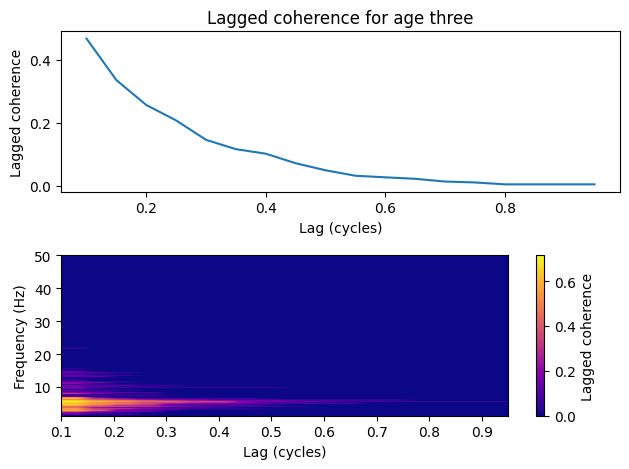

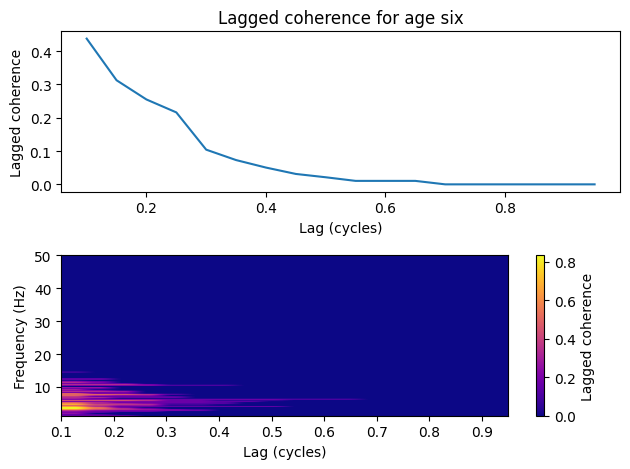

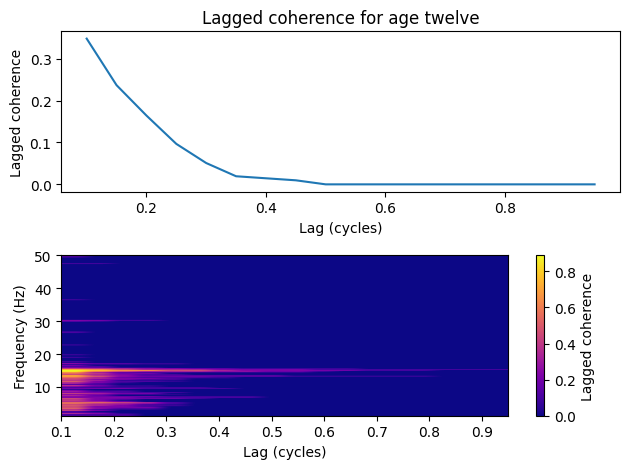

In [194]:
three_lagged_coherence = plot_lagged_coherence('three', freqs, lagged_coh_three)
six_lagged_coherence = plot_lagged_coherence ('six',freqs, lagged_coh_six)
twelve_lagged_coherence = plot_lagged_coherence ('twelve',freqs, lagged_coh_twelve) 

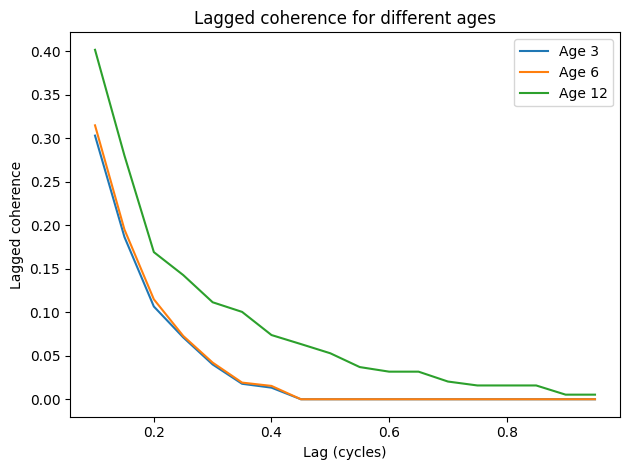

In [88]:
def plot_lagged_coherence(age, freqs, lags, ch_lc):
    if age == 3:
        age_frange = np.where((freqs >= 7) & (freqs <= 13))[0]
    elif age == 6:
        age_frange = np.where((freqs >= 6) & (freqs <= 13))[0]
    elif age == 12:
        age_frange = np.where((freqs >= 13) & (freqs <= 18))[0]
    else:
        raise ValueError("Invalid age. Supported ages are 3, 6, and 12.")

    return np.nanmean(np.nanmean(ch_lc[:, age_frange, :], axis=1), axis=0)

# Calculate lagged coherence for each age group
lagged_coherence_3 = plot_lagged_coherence(3, freqs, lags, ch_lc)
lagged_coherence_6 = plot_lagged_coherence(6, freqs, lags, ch_lc)
lagged_coherence_12 = plot_lagged_coherence(12, freqs, lags, ch_lc)

# Plot lags for each age group on top of each other
plt.plot(lags, lagged_coherence_3, label='Age 3')
plt.plot(lags, lagged_coherence_6, label='Age 6')
plt.plot(lags, lagged_coherence_12, label='Age 12')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')
plt.title('Lagged coherence for different ages')
plt.legend()
plt.tight_layout()
plt.show()

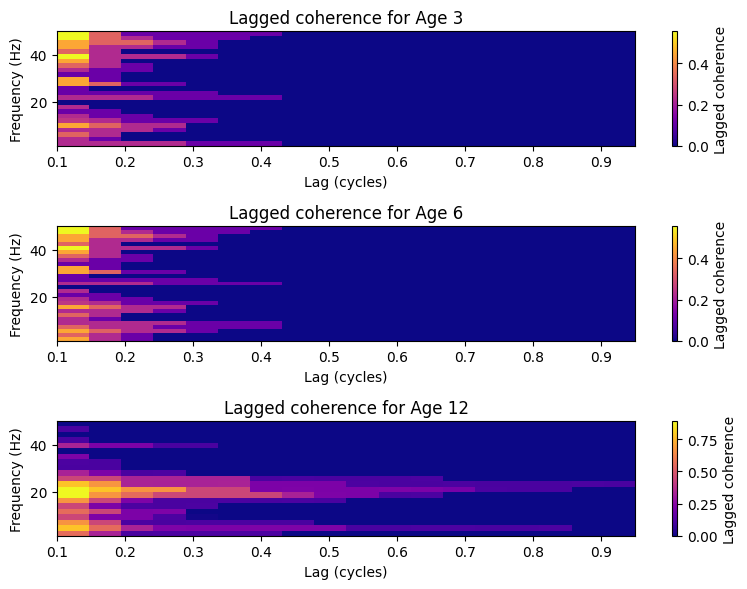

In [97]:
def plot_lagged_coherence(age, freqs, lags, ch_lc):
    if age == 3:
        age_frange = np.where((freqs >= 7) & (freqs <= 13))[0]
    elif age == 6:
        age_frange = np.where((freqs >= 6) & (freqs <= 13))[0]
    elif age == 12:
        age_frange = np.where((freqs >= 13) & (freqs <= 18))[0]
    else:
        raise ValueError("Invalid age. Supported ages are 3, 6, and 12.")

    plt.imshow(np.nanmean(ch_lc[:, age_frange, :], axis=0), aspect='auto', cmap='plasma', 
               extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
               origin='lower')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Lag (cycles)')
    plt.colorbar(label='Lagged coherence')
    plt.tight_layout()

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
plot_lagged_coherence(3, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 3')

plt.subplot(3, 1, 2)
plot_lagged_coherence(6, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 6')

plt.subplot(3, 1, 3)
plot_lagged_coherence(12, freqs, lags, ch_lc)
plt.title('Lagged coherence for Age 12')

plt.tight_layout()
plt.show()